### Setting the feelpp environment


Using device: cpu
torch loaded; device is cpu


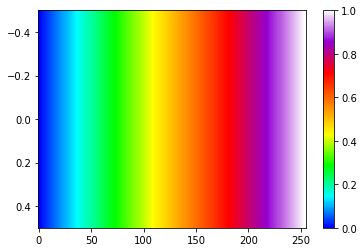

[ Starting Feel++ ] application feelpp_app version 0.1 date 2024-Jul-02
 . feelpp_app files are stored in /workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1
 .. logfiles :/workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/logs


In [1]:
import sys
import feelpp
import feelpp.toolboxes.core as tb
from tools.Poisson import Poisson, runLaplacianPk, runConvergenceAnalysis, plot_convergence, custom_cmap

sys.argv = ["feelpp_app"]
e = feelpp.Environment(sys.argv,
                       opts=tb.toolboxes_options("coefficient-form-pdes", "cfpdes"),
                       config=feelpp.localRepository('feelpp_cfpde'))

# ------------------------------------------------------------------------- #
# Poisson problem
# - div (diff * grad (u)) = f    in Omega
#                     u   = g    in Gamma_D
# Omega = domain, either cube or ball
# Approx = lagrange Pk of order order
# mesh of size h

P = Poisson(dim = 2)



### Examples with different parameters

Solving the laplacian problem for h = 0.0125...
generate mesh omega-2.geo with h=0.0125 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.0125 
+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                 |
+--------------------------------------------------------------------------------------------------------------------------------------------------------+
| +-----------------------------------------------------------------------------------------+                                                            |
| | Environment                       

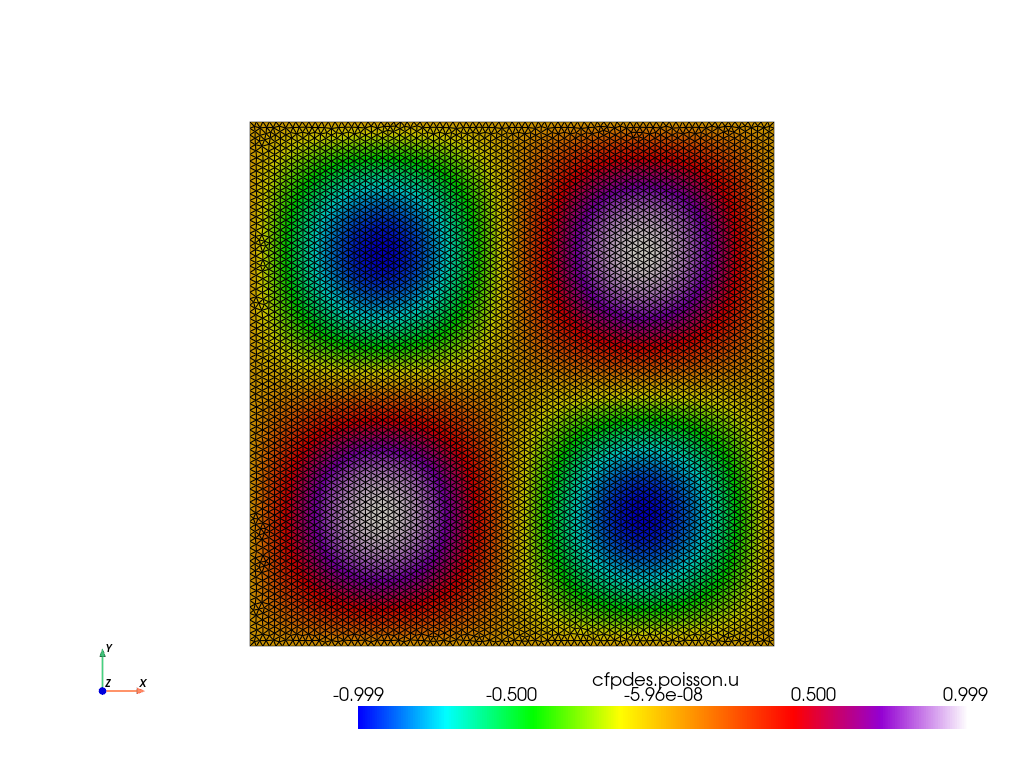

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Solving a Poisson problem for h = 0.0125...
>> load network /workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/networks/test.pth
network was not loaded from file: training needed
epoch     0: current loss = 2.21e+04
epoch     0: best loss = 2.21e+04
epoch     1: best loss = 1.23e+04
epoch     2: best loss = 5.52e+03
epoch     3: best loss = 5.26e+02
epoch     8: best loss = 7.05e+01
epoch    14: best loss = 1.77e+01
epoch    20: best loss = 4.43e+00
epoch    26: best loss = 1.41e+00
epoch    33: best loss = 7.25e-01
epoch    39: best loss = 5.06e-01
epoch    46: best loss = 1.72e-02
epoch    66: best loss = 6.21e-03
epoch    85: best loss = 4.90e-03
epoch    91: best loss = 2.67e-03
epoch    97: best loss = 2.63e-03
epoch   120: best loss = 2.45e-03
epoch   126: best loss = 2.25e-03
epoch   148: best loss = 2.19e-03
epoch   181: best loss = 2.16e-03
epoch   186: best loss = 2.15e-03
epoch   194: best loss = 2.14e-03
epoch   195: best loss = 2.13e-03
epoch   199: current lo

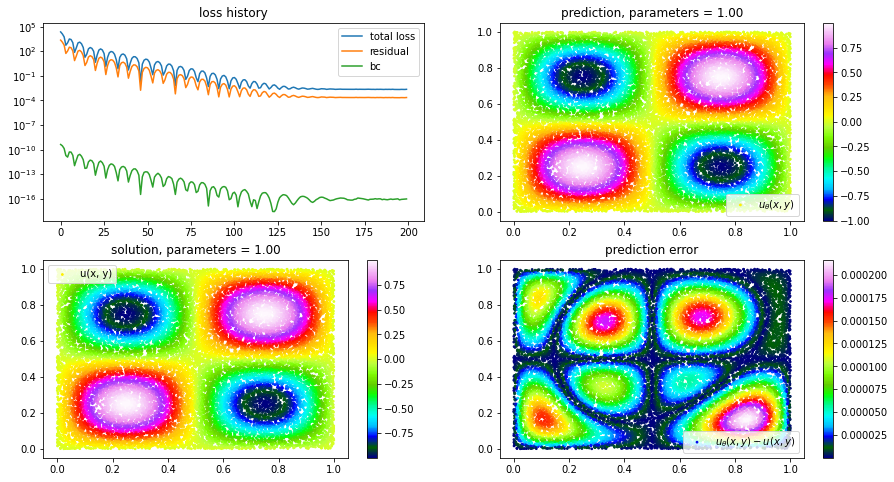

                          0
0  cfpdes.expr.grad_u_exact
1           cfpdes.expr.rhs
2       cfpdes.expr.u_exact
3          cfpdes.poisson.u
Number of features in coordinates: 3
Number of points: 7554

Nodes from export.case: [[0.32009158 0.0112713 ]
 [0.33214724 0.01079619]
 [0.32754993 0.02345362]
 ...
 [0.01827418 0.2125    ]
 [0.29523468 0.991313  ]
 [0.52455205 0.01731404]]

Feel++ solution 'cfpdes.poisson.u':
[ 0.06407735  0.05894985  0.12982139 ...  0.11136749 -0.05236771
 -0.0166978 ]

 hsize =  0.01682413635480485
Approximate mesh size h: 0.012358082739859205
Shape of input tensor (coordinates): torch.Size([7554, 2])
u( tensor([0.3201, 0.0113]) ) = 0.064020522834785
u( tensor([0.3321, 0.0108]) ) = 0.05896289403857882
u( tensor([0.3275, 0.0235]) ) = 0.12976384213432468
u( tensor([0.8272, 0.0251]) ) = -0.1391098973006621
u( tensor([0.8167, 0.0188]) ) = -0.10783714770080302
u( tensor([0.8293, 0.0119]) ) = -0.06556239387440703
u( tensor([0.8918, 0.0251]) ) = -0.09865874518536479
u(

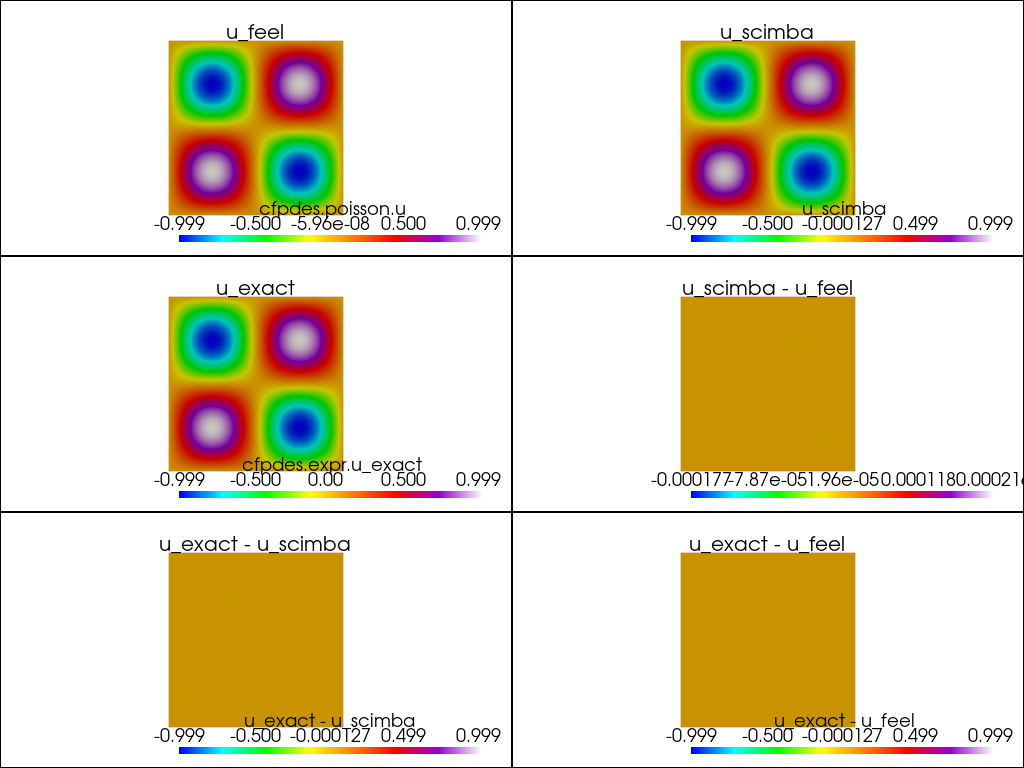

In [2]:

# for square domain

u_exact = 'sin(2*pi*x) * sin(2*pi*y)'
rhs = '8*pi*pi*sin(2*pi*x) * sin(2*pi*y)'

P(h=0.0125 ,rhs=rhs, g='0', solver ='scimba', u_exact = u_exact)


In [ ]:

u_exact = 'y + (x*(1-x) + y*(1-y)*0.25) '
P(rhs='2.5', g='y + (x*(1-x) + y*(1-y)*0.25)', solver ='scimba', u_exact = u_exact)


In [ ]:
# for disk domain

u_exact = 'sin(pi*(x*x + y*y))'
rhs = '-4*pi*cos(pi*(x*x + y*y)) + 4*pi*pi*(x*x + y*y)*sin(pi*(x*x + y*y))'

P(rhs=rhs, g='0', shape='Disk', solver='scimba', u_exact=u_exact)


In [ ]:
u_exact =  '(1 - x*x - y*y)'

P(rhs='4', g= '0', shape= 'Disk', solver='scimba', u_exact = u_exact)

Solving the laplacian problem for h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                   |
+----------------------------------------------------------------------------------------------------------------------------------------------------------+
| +-----------------------------------------------------------------------------------------+                                                              |
| | Environment                     

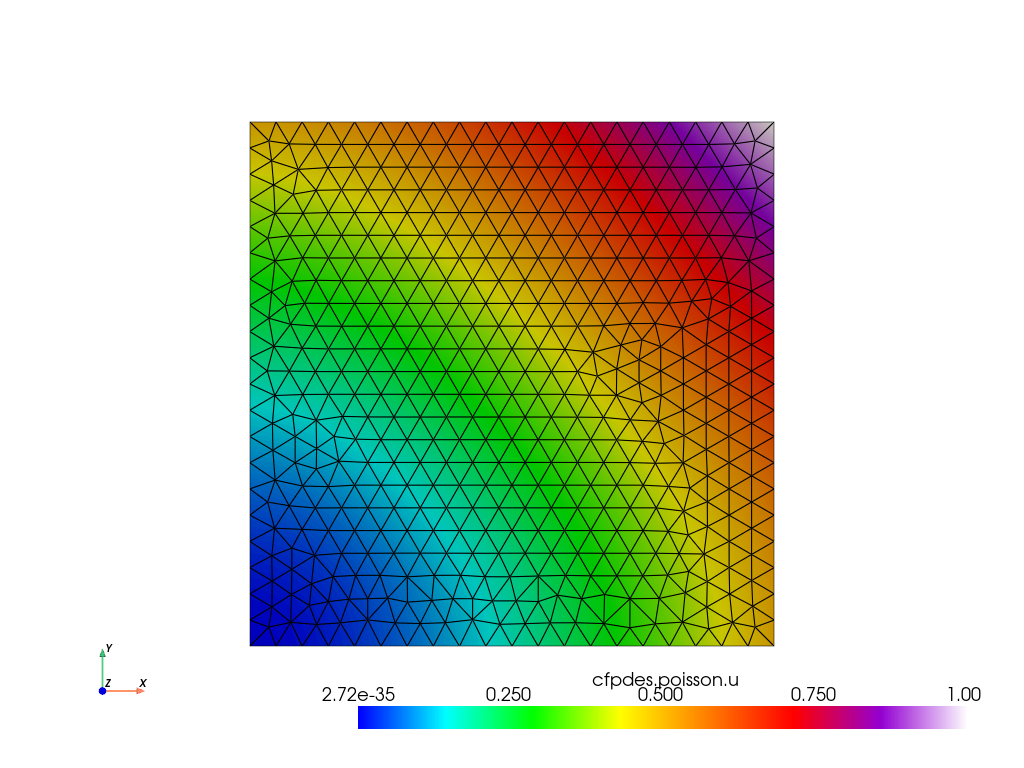

Solving a Poisson problem for h = 0.05...
>> load network /workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/networks/test.pth
network was not loaded from file: training needed
epoch     0: current loss = 1.02e+02
epoch     0: best loss = 1.02e+02
epoch     1: best loss = 5.81e+01
epoch     2: best loss = 2.54e+01
epoch     3: best loss = 2.30e+00
epoch     7: best loss = 1.68e+00
epoch     8: best loss = 1.02e+00
epoch    13: best loss = 4.23e-01
epoch    20: best loss = 3.58e-01
epoch    21: best loss = 3.56e-01
epoch    28: best loss = 3.22e-01
epoch    29: best loss = 2.90e-01
epoch    36: best loss = 2.08e-01
epoch    37: best loss = 1.93e-01
epoch    43: best loss = 1.66e-01
epoch    44: best loss = 1.22e-01
epoch    50: best loss = 8.11e-02
epoch    51: best loss = 5.57e-02
epoch    56: best loss = 3.34e-02
epoch    57: best loss = 2.00e-02
epoch    62: best loss = 1.45e-02
epoch    63: best loss = 1.32e-02
epoch    73: best loss = 1.21e-02
epoch    74: best loss = 

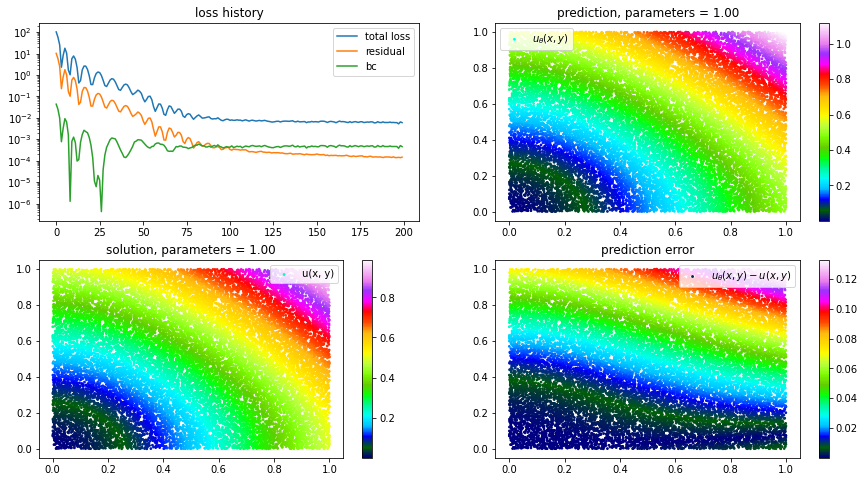

                          0
0  cfpdes.expr.grad_u_exact
1           cfpdes.expr.rhs
2       cfpdes.expr.u_exact
3          cfpdes.poisson.u
Number of features in coordinates: 3
Number of points: 517

Nodes from export.case: [[0.82477343 0.04606718]
 [0.8300841  0.10191753]
 [0.7806651  0.09123866]
 ...
 [0.8390992  0.3016979 ]
 [0.8367227  0.1427201 ]
 [0.7476512  0.5844005 ]]

Feel++ solution 'cfpdes.poisson.u':
[3.76265317e-01 3.88901174e-01 3.53013813e-01 6.39755502e-02
 8.36924985e-02 7.99496025e-02 7.88235307e-01 7.77451158e-01
 7.43493915e-01 2.76082188e-01 3.15237820e-01 2.88235307e-01
 3.15580815e-01 3.07254106e-01 3.40455621e-01 4.42461520e-01
 4.47269469e-01 4.14715320e-01 6.15916662e-02 2.75622636e-01
 2.85768151e-01 1.81298852e-01 2.05479741e-01 2.16002733e-01
 1.84969917e-01 8.84883851e-02 7.87167102e-02 9.94065255e-02
 2.56376028e-01 1.11827716e-01 2.41881713e-01 4.07505304e-01
 1.59044728e-01 1.56661481e-01 1.31011620e-01 1.18826389e-01
 1.04846478e-01 6.34396598e-02 6.4

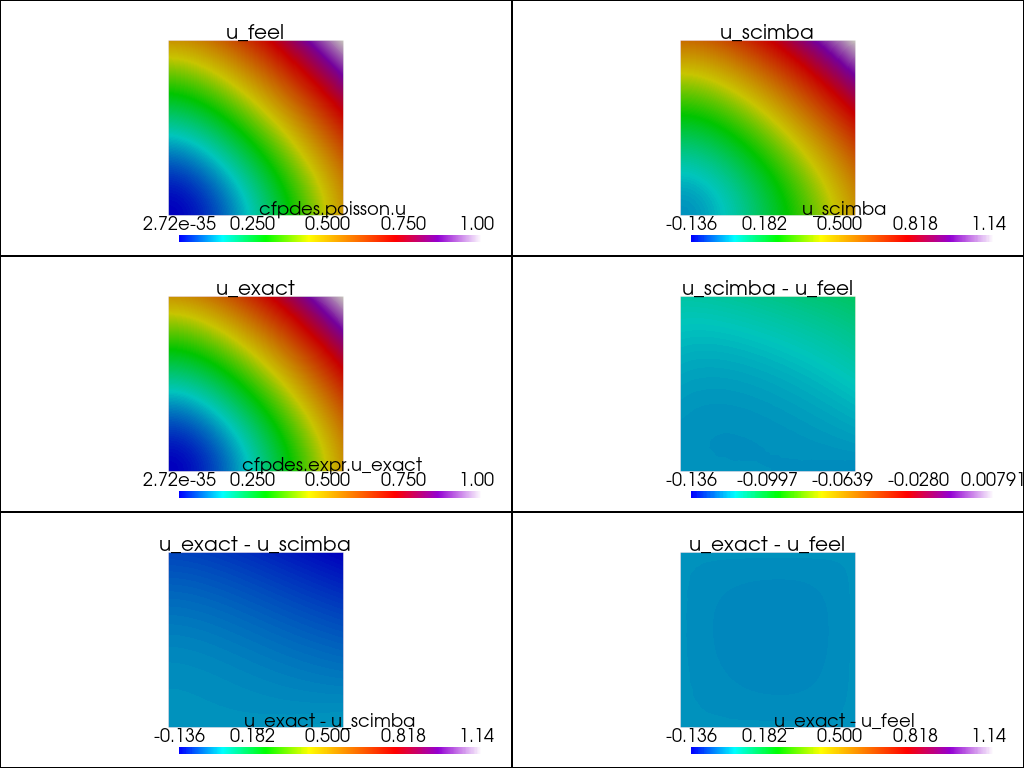

In [3]:


# # 2D with varying anisotropy
P = Poisson(dim = 2)
u_exact = 'x*x/(1+x) + y*y/(1+y)'
rhs = '-(4 + 2*x + 2*y) / ((1+x)*(1+y))'
P(rhs=rhs, diff='{1+x,0,0,1+y}', g='x*x/(1+x) + y*y/(1+y)', solver='scimba', u_exact = u_exact)


### Computing errors

In [ ]:
# Collect data to compute errors
u_exact = 'sin(2*pi*x) * sin(2*pi*y)'
grad_u_exact = '{2*pi*cos(2*pi*x) * sin(2*pi*y), 2*pi*sin(2*pi*x) * cos(2*pi*y)}'
rhs = '8*pi*pi*sin(2*pi*x) * sin(2*pi*y)'

h= [0.1, 0.05, 0.025, 0.0125, 0.00625]
measures = []

for i in h:
  P(h=i, rhs=rhs, g='0', plot = None, u_exact = u_exact, grad_u_exact = grad_u_exact)
  measures.append(P.measures)
  print("this is the measures = ", measures)


print("this is the measures = ", measures)

# Plotting the error convergence rates
poisson_json = P.model
df= runConvergenceAnalysis( P, json=poisson_json, measures=measures, dim=2, hs= h,verbose=True)
print('measures = ', measures)
fig= plot_convergence(P, df,dim=2)
fig.show()


In [ ]:
# Collect data to compute errors
u_exact = 'y + (x*(1-x) + y*(1-y)*0.25) '
grad_u_exact = '{1-2*x, 1.25 - 0.5*y}'
rhs='2.5'
g='y'


h= [0.1, 0.05, 0.025, 0.0125, 0.00625]
measures = []

for i in h:
  P(h=i, rhs=rhs, g=u_exact, plot=None , u_exact = u_exact, grad_u_exact=grad_u_exact)
  measures.append(P.measures)

print(measures)

# Plotting the error convergence rates

poisson_json = P.model
df= runConvergenceAnalysis( P, json=poisson_json, measures=measures, dim=2, hs= h,verbose=True)
print('measures = ', measures)
fig= plot_convergence(P, df,dim=2)
fig.show()

In [ ]:
# Collect data to compute errors

u_exact =  'sin(pi*(x*x + y*y))'
grad_u_exact = '{2*pi*x*cos(pi*(x*x + y*y)), 2*pi*y*cos(pi*(x*x + y*y))}'
rhs = '4*pi*pi*(x*x + y*y)*sin(pi*(x*x + y*y)) - 4*pi*cos(pi*(x*x + y*y))'

h= [0.1, 0.05, 0.025, 0.0125, 0.00625]
measures = []
for i in h:
  P(h=i, rhs=rhs, g='0', plot=None , shape= 'Disk', u_exact = u_exact, grad_u_exact = grad_u_exact)
  measures.append(P.measures)

print('measures = ', measures)

# Plotting the error convergence rates
poisson_json = P.model
df= runConvergenceAnalysis( P, json=poisson_json, measures=measures, dim=2, hs= h, verbose=True)
fig= plot_convergence(P, df,dim=2)
fig.show()

In [ ]:
# Collect data to compute errors
u_exact =  '(1 - (x*x + y*y))'
grad_u_exact = '{-2*x, -2*y}'
rhs = '4'
g='0'

h= [0.1, 0.05, 0.025, 0.0125, 0.00625]
measures = []

for i in h:
  P(h=i, rhs=rhs, g=u_exact, plot=None , shape= 'Disk', u_exact = u_exact, grad_u_exact=grad_u_exact)
  measures.append(P.measures)

print(measures)

# Plotting the error convergence rates
poisson_json = P.model
df= runConvergenceAnalysis( P, json=poisson_json, measures=measures, dim=2, hs= h,verbose=True)
print('measures = ', measures)
fig= plot_convergence(P, df,dim=2)
fig.show()


Solving the laplacian problem for h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+--------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                               |
+--------------------------------------------------------------------------------------------------------------------------------------+
| +-----------------------------------------------------------------------------------------+                                          |
| | Environment                                                                             |                       

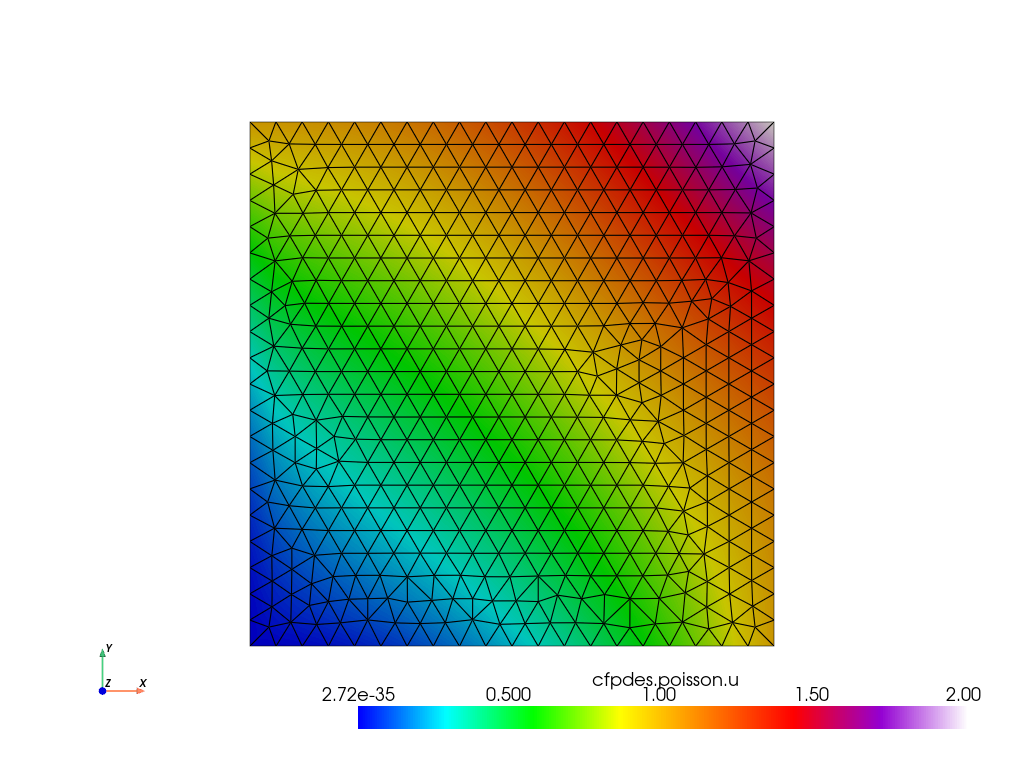

Solving a Poisson problem for h = 0.05...
>> load network /workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/networks/test.pth
network was not loaded from file: training needed
epoch     0: current loss = 5.87e+01
epoch     0: best loss = 5.87e+01
epoch     1: best loss = 8.37e-01
epoch     8: best loss = 5.57e-01
epoch    21: best loss = 4.53e-01
epoch    27: best loss = 4.23e-01
epoch    34: best loss = 3.92e-01
epoch    41: best loss = 3.73e-01
epoch    42: best loss = 3.62e-01
epoch    55: best loss = 3.34e-01
epoch    59: best loss = 3.26e-01
epoch    62: best loss = 3.16e-01
epoch    79: best loss = 3.12e-01
epoch    96: best loss = 2.95e-01
epoch   199: current loss = 3.51e-01
load network: /workspaces/2024-stage-feelpp-scimba/feelppdb/feelpp_cfpde/np_1/networks/test.pth
jsbdbshd
network loaded


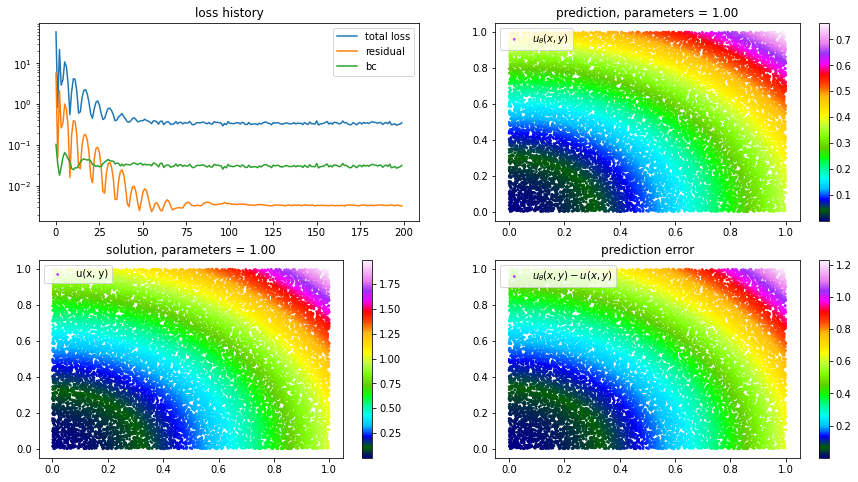

                          0
0  cfpdes.expr.grad_u_exact
1           cfpdes.expr.rhs
2       cfpdes.expr.u_exact
3          cfpdes.poisson.u
Number of features in coordinates: 3
Number of points: 517

Nodes from export.case: [[0.82477343 0.04606718]
 [0.8300841  0.10191753]
 [0.7806651  0.09123866]
 ...
 [0.8390992  0.3016979 ]
 [0.8367227  0.1427201 ]
 [0.7476512  0.5844005 ]]

Feel++ solution 'cfpdes.poisson.u':
[7.08907545e-01 7.51020133e-01 6.73293650e-01 1.70469165e-01
 2.21864417e-01 1.77544668e-01 1.49000001e+00 1.48025346e+00
 1.40831614e+00 5.28039098e-01 6.13303900e-01 4.90000010e-01
 5.96904755e-01 5.53694308e-01 6.28500402e-01 8.80133986e-01
 8.84720862e-01 8.17113817e-01 1.28769025e-01 4.93392736e-01
 5.41159570e-01 3.43818516e-01 3.85049820e-01 4.28756803e-01
 3.74851495e-01 2.20678464e-01 1.77104473e-01 2.11247280e-01
 4.81410414e-01 2.58222073e-01 4.27521944e-01 8.09988856e-01
 3.31993073e-01 3.02074432e-01 2.34228313e-01 2.43680477e-01
 1.87474519e-01 1.24697857e-01 1.6

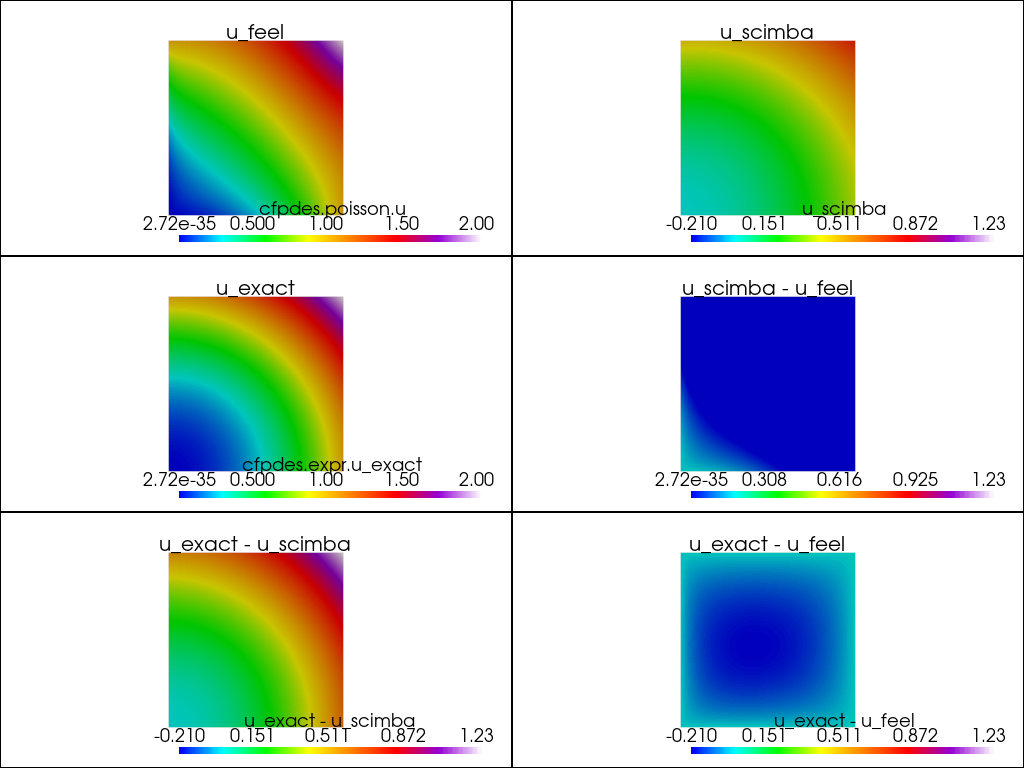

In [4]:

u_exact = 'x*x + y*y'
grad_u_exact = '{2*x, 2*y}'
P(rhs='-2*x - 2*y', diff='{x,y,-y,x+y}', g='x*x + y*y', solver = 'scimba' ,u_exact = u_exact, grad_u_exact= grad_u_exact)
